# Assignment 5

## Approach
According to the animation uploaded on moodle, we see that each vertex splits except `(1,0)` and merges to the corresponding one at he vertex of the next n-sided polygon.

The animation ranges from triangle to octagon.

So let us get started.

## Importing Libraries
We import the libraries required to compute, plot and animate.

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Initializing figure
We initialize our fifure on which we will plot and animate.

We will use a blue line, indicated by `b`, and set the `x-axis` and `y-axis` limits from `(-1.2,1.2)`.

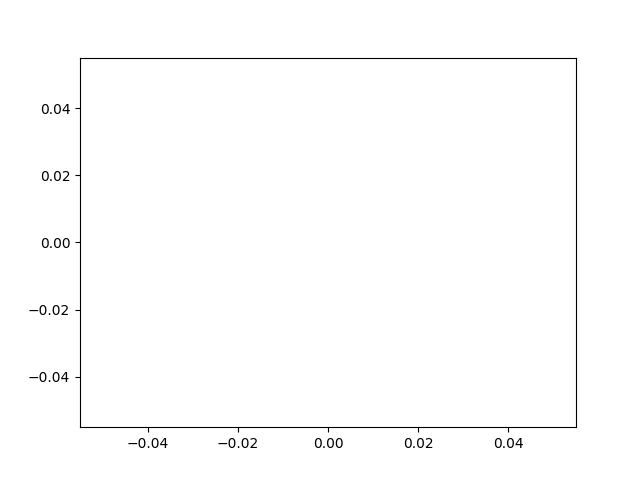

In [2]:
fig, ax = plt.subplots()
xdata, ydata = [], []
t=0
ln, = ax.plot([], [], 'b')
def init():
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,

## Polygon Points
This function gives us the coordinates for the vertices of a n-sided polygon. This polygon has circumcentre at `(0,0)` with circumradius `1`.

This will be used to generate intermediate figures.

In [3]:
def polygon_points(j):
    xa=[1]
    ya=[0]
    theta=2*np.pi/j
    for i in range(1,j):
        xa.append(np.cos(theta*i))
        ya.append(np.sin(theta*i))
    xa.append(1.0)
    ya.append(0.0)
    return np.array(xa),np.array(ya)

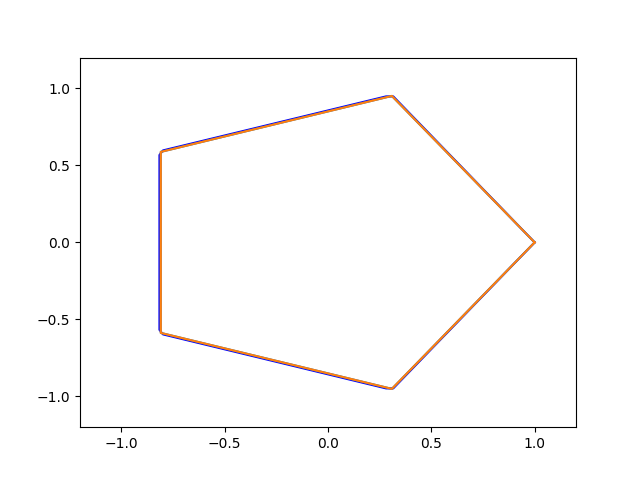

In [12]:
u,i=polygon_points(5)
plt.plot(u,i)
plt.show()

## Poly Inter
This function gives us the coordinates of the intermediate figure from one polygon to another.

It takes in the parameters `n1` and `f`, where `n1` is the number of sides of the polygon when it is transforming to the higher polygon. `f` is the **weight** of the polygon-transformation from one to another. This value ranges from `0` to `1`, `0` being the the `n1` sided polygon, `1` being the `n1+1` sided polygon.

In [4]:
def poly_inter(n1,f):
    a,b=polygon_points(n1)
    a1,b1=polygon_points(n1+1)
    x_f=[]
    y_f=[]
    xa=(1-f)*np.array(list(a)[1:-1])+f*np.array(list(a1)[2:-1])
    ya=(1-f)*np.array(list(b)[1:-1])+f*np.array(list(b1)[2:-1])
    xb=(1-f)*np.array(list(a)[1:-1])+f*np.array(list(a1)[1:-2])
    yb=(1-f)*np.array(list(b)[1:-1])+f*np.array(list(b1)[1:-2])
    xa=np.concatenate((np.array(list([1.0])),xa,np.array(list([1.0]))))
    ya=np.concatenate((np.array(list([0.0])),ya,np.array(list([0.0]))))
    xb=np.concatenate((np.array(list([1.0])),xb,np.array(list([1.0]))))
    yb=np.concatenate((np.array(list([0.0])),yb,np.array(list([0.0]))))
    for j in range(len(xa)):
        x_f.append(list(xb)[j])
        x_f.append(list(xa)[j])
        y_f.append(list(yb)[j])
        y_f.append(list(ya)[j])   
    return x_f,y_f

## Final Coordinates
This block combines all the coordinates of the polygons and intermediate polygons. here `30` signifies the number of intermediate polygons in a tranformation, `30` was chosen after experimenting nd this resulted in a smooth and not too slow animation.

In [5]:
xfinal=[]
yfinal=[]
for k in range(3,8):
    xt1=[]
    yt1=[]
    for j in np.linspace(0,1,30):
        xt,yt=poly_inter(k,j)
        xt1.append(xt)
        yt1.append(yt)
    xfinal.append(list(xt1))
    yfinal.append(list(yt1))
    

## Reversed coordinates
This block reverses the coordinates for the second half of the video and adds it to `xfinal` and `yfinal`.

In [6]:
x_temp1=[]
y_temp1=[]
for i in range(len(xfinal)):
    x_temp1.append(xfinal[i][::-1])
for i in range(len(yfinal)):
    y_temp1.append(yfinal[i][::-1])
xfinal=xfinal+x_temp1[::-1]
yfinal=yfinal+y_temp1[::-1]

## Update Fuction
This function is passed to the `FuncAnimation` function and it just gives the coordinates of the polygon to be animated.

This function is simple as we have generated the intermediate polygons by ourselves. 

`frame` varies from 0 to 359, `nt` will vary from 0 to 11. As `len(xfinal)=12`, `nt` will be used to access all the lists of lists in `xfinal` and `yfinal`.

`t` will range from 0 to 19, hence it will be used to index the lists with each list in `xfinal` and `yfinal`. Like `len(xfinal[0])=20`

In [7]:
def update(frame):
    nt=frame//30
    t = frame%30
    xc=np.array(xfinal[nt][t])
    yc=np.array(yfinal[nt][t])
    ln.set_data(xc, yc)    
    return ln,
    

## Final Function
This is the final function to run our animation.

We have used `frames=360` as it will go through our `(6*30)*2` lists.(*2 because we have to account for reversing).

We have also chosen `interval` = 20 as it results in a smoother animation.

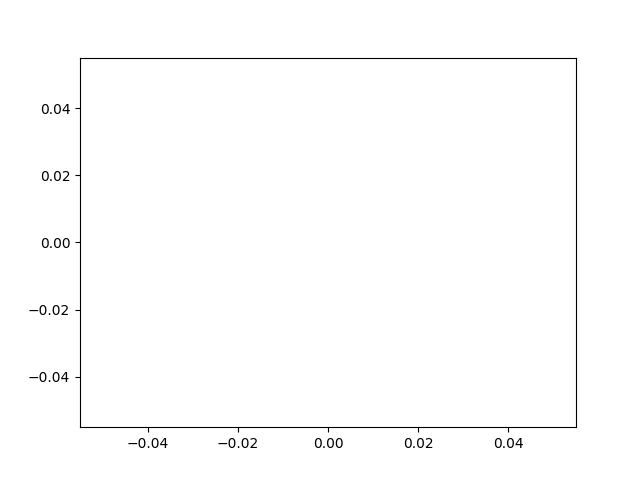

In [8]:
anim = FuncAnimation(fig, update, frames=360,init_func=init, blit=True, interval=20, repeat=True)
plt.show()

## Conclusion
The animation was recreated in a similar manner to the one provided. Although the timing of the animation could not be matched, this is because of the way my program was coded, it did not allow me much flexibility to match te one provide. 

All in all the **method** of animation is exactly the same.